<a href="https://colab.research.google.com/github/solong96/solong96/blob/main/spatial_category_1012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import csv
from tqdm import tqdm
import collections
import sys
import os
import openpyxl
import re
import pandas as pd
import numpy as np
import json
import warnings
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets				# 내장 데이터 사용
from sklearn.model_selection import train_test_split	# train, test 데이터 분할
from keras.utils import to_categorical

from sklearn.linear_model import LinearRegression	# 선형 회귀분석
from sklearn.linear_model import LogisticRegression	# 로지스틱 회귀분석
from sklearn.naive_bayes import GaussianNB		# 나이브 베이즈
from sklearn import svm					# 서포트 벡터 머신
from sklearn import tree				# 의사결정나무
from sklearn.ensemble import RandomForestClassifier	# 랜덤포레스트

from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [5]:
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# # 다시 출력하게 하기
# warnings.filterwarnings(action='default')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [8]:
# content = pd.read_excel('F:/02. 유영은(박사과정)/OneDrive - 충북대학교/05. 수업/08. AI 교육/ICT/spatial_category/gir_landuse_binary.xlsx')
content = pd.read_excel('/content/drive/MyDrive/gir_landuse_binary2.xlsx')
content

,ID,년도,시군구,산업,산업공정,수송,건물,농업,폐기물,LULUCF,주거,상업,공업,녹지,도농,space,s_class,urban,u_class
0,1,2020,강원_강릉시,2083865,3020664,529117,725608,116325,154098,-633185,0.023249,0.002449,0.007608,0.072632,0.894062,도농,4,산업도시,1
1,2,2020,강원_고성군,43710,2,55157,128696,80519,16174,-464376,0.008965,0.001150,0.000600,0.024243,0.965042,도농,4,농촌도시,2
2,3,2020,강원_동해시,2890367,5061718,182941,274173,12325,61268,-112126,0.087770,0.014250,0.059450,0.543740,0.294790,녹지,3,산업도시,1
3,4,2020,강원_삼척시,5022982,3741502,125678,311476,54536,49728,-685949,0.009543,0.000952,0.007405,0.053718,0.928382,도농,4,산업도시,1
4,5,2020,강원_속초시,27626,3,148334,299526,15141,62167,-90611,0.169990,0.062598,0.029240,0.738172,0.000000,녹지,3,산업도시,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1370,2015,충북_제천시,1604959,1860947,296012,525396,96136,81561,-418687,0.011409,0.002047,0.005732,0.079758,0.901054,도농,4,산업도시,1
1370,1371,2015,충북_증평군,222774,3,75245,108666,38855,17083,-27874,0.061151,0.005401,0.035780,0.193115,0.704553,도농,4,농촌도시,2
1371,1372,2015,충북_진천군,951474,142885,151827,242326,217998,95416,-24798,0.021845,0.002120,0.015374,0.051388,0.909272,도농,4,농촌도시,2
1372,1373,2015,충북_청주시,3963163,463526,1714424,2762922,435388,939416,-144924,0.060109,0.006961,0.026848,0.417691,0.488391,도농,4,산업도시,1


In [9]:
contents = content.copy()
contents = contents.loc[:,content.columns[3:19]]
# contents['class'] = content['class']
contents

,산업,산업공정,수송,건물,농업,폐기물,LULUCF,주거,상업,공업,녹지,도농,space,s_class,urban,u_class
0,2083865,3020664,529117,725608,116325,154098,-633185,0.023249,0.002449,0.007608,0.072632,0.894062,도농,4,산업도시,1
1,43710,2,55157,128696,80519,16174,-464376,0.008965,0.001150,0.000600,0.024243,0.965042,도농,4,농촌도시,2
2,2890367,5061718,182941,274173,12325,61268,-112126,0.087770,0.014250,0.059450,0.543740,0.294790,녹지,3,산업도시,1
3,5022982,3741502,125678,311476,54536,49728,-685949,0.009543,0.000952,0.007405,0.053718,0.928382,도농,4,산업도시,1
4,27626,3,148334,299526,15141,62167,-90611,0.169990,0.062598,0.029240,0.738172,0.000000,녹지,3,산업도시,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1604959,1860947,296012,525396,96136,81561,-418687,0.011409,0.002047,0.005732,0.079758,0.901054,도농,4,산업도시,1
1370,222774,3,75245,108666,38855,17083,-27874,0.061151,0.005401,0.035780,0.193115,0.704553,도농,4,농촌도시,2
1371,951474,142885,151827,242326,217998,95416,-24798,0.021845,0.002120,0.015374,0.051388,0.909272,도농,4,농촌도시,2
1372,3963163,463526,1714424,2762922,435388,939416,-144924,0.060109,0.006961,0.026848,0.417691,0.488391,도농,4,산업도시,1


In [16]:
contents.groupby('urban')['산업','산업공정'].describe()

산업                                                            \
       count          mean           std      min        25%       50%   
urban                                                                    
농촌도시   462.0  4.014579e+05  7.132475e+05   4389.0   78870.75  126490.5   
대도시    462.0  8.904552e+05  3.025762e+06   5170.0   30279.25  109741.5   
산업도시   372.0  2.661740e+06  4.130504e+06   6646.0  410823.00  909361.5   
흡수도시    78.0  5.807102e+05  4.650702e+05  66269.0  253531.00  390982.5   

                                산업공정                                       \
              75%         max  count          mean           std      min   
urban                                                                       
농촌도시    422850.50   5372776.0  462.0  1.751915e+05  9.455597e+05   -936.0   
대도시     604703.25  24535079.0  462.0  3.320515e+05  1.459760e+06 -14030.0   
산업도시   3123650.25  19764469.0  372.0  1.797908e+06  3.561533e+06 -24245.0   
흡수도시    908243.50   1732227.0   78.0  1.940232e+04  5.185199e+04      6.0   

                                             
         25%     50%        75%         max  
urban                                        
농촌도시    2.00     4.0      220.0   8195582.0  
대도시     8.00    19.0     9998.0  12204656.0  
산업도시    8.75  9033.5  1869826.5  17491529.0  
흡수도시   10.25   779.5     5365.5    252403.0

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

contents[contents.columns[0:7]] = scaler.fit_transform(contents[contents.columns[0:7]])
contents.head()

,산업,산업공정,수송,건물,농업,폐기물,LULUCF,주거,상업,공업,녹지,도농,space,s_class,urban,u_class
0,0.084770,0.173838,0.172583,0.127051,0.089698,0.158234,0.399633,0.023249,0.002449,0.007608,0.072632,0.894062,도농,4,산업도시,1
1,0.001603,0.001384,0.010152,0.018173,0.062088,0.014009,0.502435,0.008965,0.001150,0.000600,0.024243,0.965042,도농,4,농촌도시,2
2,0.117648,0.290365,0.053945,0.044708,0.009503,0.061163,0.716948,0.087770,0.014250,0.059450,0.543740,0.294790,녹지,3,산업도시,1
3,0.204584,0.214992,0.034320,0.051513,0.042052,0.049096,0.367501,0.009543,0.000952,0.007405,0.053718,0.928382,도농,4,산업도시,1
4,0.000947,0.001384,0.042085,0.049333,0.011675,0.062103,0.730051,0.169990,0.062598,0.029240,0.738172,0.000000,녹지,3,산업도시,1


In [19]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [51]:
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

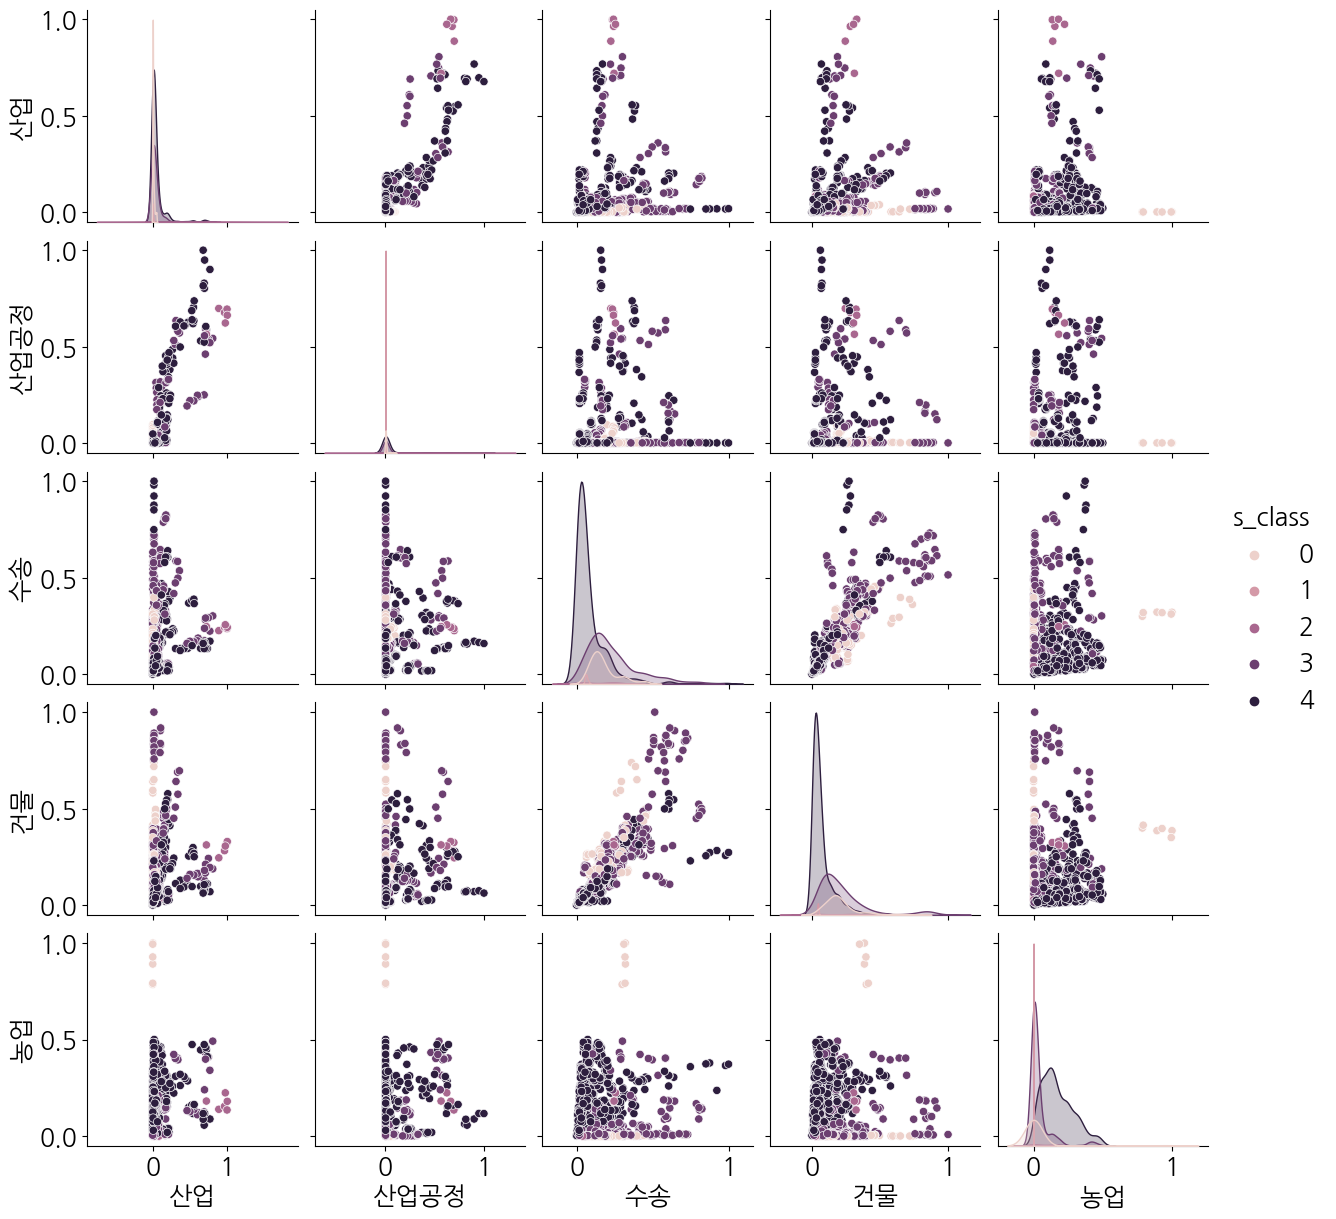

In [ ]:
import seaborn as sns

sns.pairplot(contents, hue='s_class', vars = contents.columns[0:6])
plt.show()

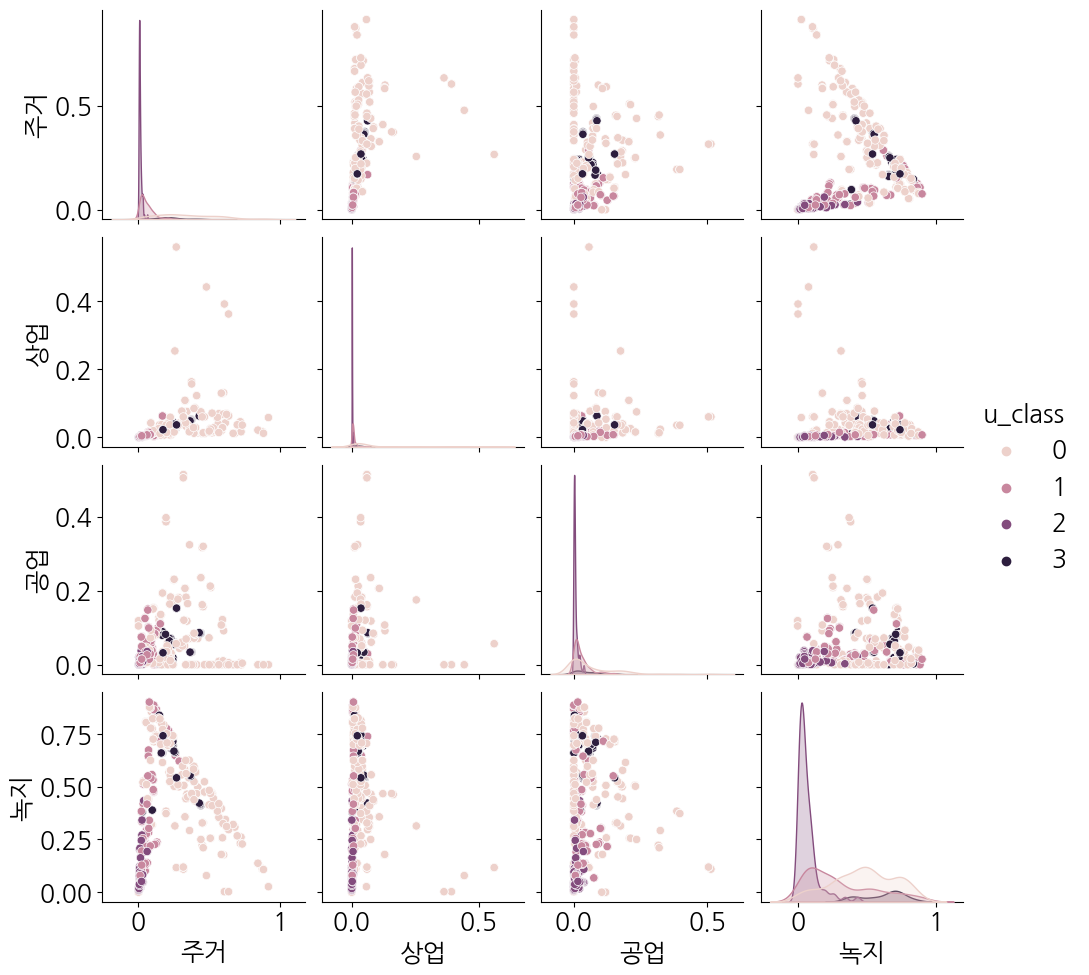

In [ ]:
import seaborn as sns

sns.pairplot(contents, hue='u_class', vars = contents.columns[6:11])
plt.show()

In [20]:
contents['s_class'].unique()

array([4, 3, 0, 1, 2])

In [73]:
x_data = pd.DataFrame(contents[contents.columns[0:7]])
y_data = contents.loc[:,'s_class']

print(x_data[0:5])
print(y_data[0:5])

         산업      산업공정        수송        건물        농업       폐기물    LULUCF
0  0.084770  0.173838  0.172583  0.127051  0.089698  0.158234  0.399633
1  0.001603  0.001384  0.010152  0.018173  0.062088  0.014009  0.502435
2  0.117648  0.290365  0.053945  0.044708  0.009503  0.061163  0.716948
3  0.204584  0.214992  0.034320  0.051513  0.042052  0.049096  0.367501
4  0.000947  0.001384  0.042085  0.049333  0.011675  0.062103  0.730051
0    4
1    4
2    3
3    4
4    3
Name: s_class, dtype: int64


In [74]:
(x_train, x_valid, y_train, y_valid) = train_test_split(x_data, y_data, train_size=0.8, random_state=1)
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((1099, 7), (1099,), (275, 7), (275,))

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import all_estimators

In [59]:
# (1) classifier 알고리즘 모두 추출하기
allAlgorithms = all_estimators(type_filter="classifier")

for(name, algorithm) in allAlgorithms:
    # (1) 알고리즘 종류 확인
    print(name)

    # # 현재 자료형이 안 맞아서 학습되지 않는 알고리즘들이기에 제외해야 한다 -> 추가로 코딩을 예쁘게
    # if name=='CheckingClassifier' or name=='ClassifierChain' \
    #     or name=='MultiOutputClassifier' or name=='OneVsOneClassifier' \
    #     or name=='OneVsRestClassifier' or name=='OutputCodeClassifier' \
    #     or name=='VotingClassifier' or name=='StackingClassifier':
    #     continue

    #-----------------------------------------
    # 에러가 발생하면 위에 print(name)으로 알고리즘을 확인 후 에러난 알고리즘이름을 위에 추가한다

    # # (2) 각 알고리즘 객체 생성하기
    # clf = algorithm()

    # # (3) 학습하고 평가하기
    # clf.fit(x_train, y_train)
    # y_pred = clf.predict(x_valid)
    # print(name,"의 정답률 = " , accuracy_score(y_valid, y_pred))

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
OutputCodeClassifier
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RadiusNeighborsClassifier
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),oob_score=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

##########모델 검증

print(model.score(x_train, y_train)) #
print(accuracy_score(y_valid, y_pred))

1.0
0.9709090909090909


In [47]:
bagging_rf_ensemble = RandomForestClassifier()

bagging_rf_ensemble.fit(x_train, y_train)
y_pred = bagging_rf_ensemble.predict(x_valid)

print("bagging RandomForest 분류기 정확도 {0:.4f}".format(accuracy_score(y_valid, y_pred)))

bagging RandomForest 분류기 정확도 0.9891


In [48]:
bagging_rf_ensemble.feature_importances_

array([0.08494789, 0.0432201 , 0.12242282, 0.14204672, 0.29373543,
       0.07707494, 0.2365521 ])

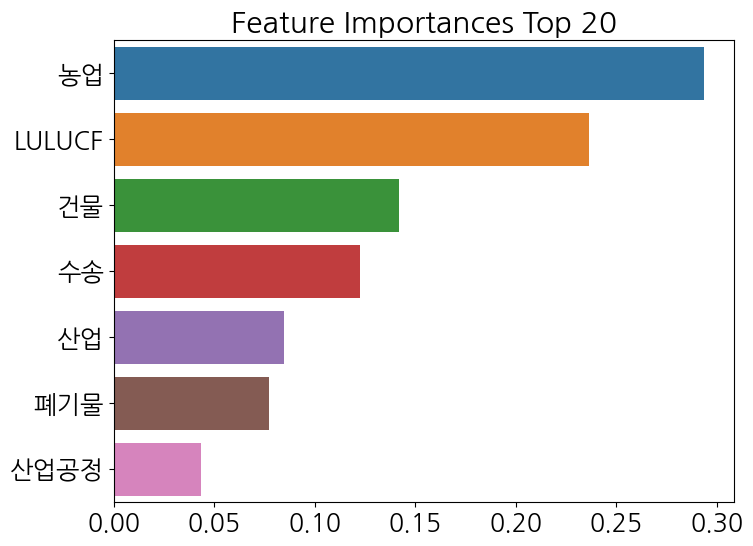

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importances_values = bagging_rf_ensemble.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=x_data.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

In [54]:
# %pip install mglearn///
import matplotlib.pyplot as plt
import mglearn

In [46]:
model.oob_decision_function_

array([[0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0.6, 0. , 0. , 0.4, 0. ],
       ...,
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [1. , 0. , 0. , 0. , 0. ]])

In [ ]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

pred = lr.predict(x_valid[:5])
print(pred)

In [71]:
x = pd.DataFrame(contents[contents.columns[0:7]])
y = pd.DataFrame(contents[['s_class']])
y

df = pd.concat([x, y], axis = 1)
df

,산업,산업공정,수송,건물,농업,폐기물,LULUCF,s_class
0,0.084770,0.173838,0.172583,0.127051,0.089698,0.158234,0.399633,4
1,0.001603,0.001384,0.010152,0.018173,0.062088,0.014009,0.502435,4
2,0.117648,0.290365,0.053945,0.044708,0.009503,0.061163,0.716948,3
3,0.204584,0.214992,0.034320,0.051513,0.042052,0.049096,0.367501,4
4,0.000947,0.001384,0.042085,0.049333,0.011675,0.062103,0.730051,3
...,...,...,...,...,...,...,...,...
1369,0.065248,0.107628,0.092695,0.090532,0.074131,0.082383,0.530258,4
1370,0.008903,0.001384,0.017036,0.014520,0.029961,0.014960,0.768256,4
1371,0.038608,0.009542,0.043282,0.038899,0.168099,0.096871,0.770130,4
1372,0.161380,0.027848,0.578799,0.498662,0.335731,0.979431,0.696975,4


In [ ]:
print(lr.score(x_train, y_train))
print(lr.score(x_valid, y_valid))

0.7461328480436761
0.7854545454545454


In [ ]:
lr.coef_

# https://itstory1592.tistory.com/11 해석참조

array([[-2.57479007, -1.27530407, -0.52574164,  3.06128333, -2.54014447,
         1.21255828],
       [-0.17623553, -0.14971159, -0.33764103, -0.38817789, -0.34151394,
        -0.34300064],
       [ 2.65670384,  1.2288381 , -0.3429411 ,  0.02198296, -0.21596358,
         0.21386214],
       [ 0.74782866, -1.05281292,  2.42220335,  1.89559845, -3.83829448,
        -0.01520165],
       [-0.6535069 ,  1.24899048, -1.21587958, -4.59068685,  6.93591646,
        -1.06821814]])

In [ ]:
lr.intercept_

array([ 0.60224599, -2.21332229, -2.0636302 ,  1.36074683,  2.31395967])

In [ ]:
X = pd.DataFrame(lr.coef_)
X.columns = contents.columns[0:6]
X

,산업,산업공정,수송,건물,농업,폐기물
0,-2.574790,-1.275304,-0.525742,3.061283,-2.540144,1.212558
1,-0.176236,-0.149712,-0.337641,-0.388178,-0.341514,-0.343001
2,2.656704,1.228838,-0.342941,0.021983,-0.215964,0.213862
3,0.747829,-1.052813,2.422203,1.895598,-3.838294,-0.015202
4,-0.653507,1.248990,-1.215880,-4.590687,6.935916,-1.068218


In [ ]:
X['절편'] = pd.DataFrame(lr.intercept_)
X

,산업,산업공정,수송,건물,농업,폐기물,절편
0,-2.574790,-1.275304,-0.525742,3.061283,-2.540144,1.212558,0.602246
1,-0.176236,-0.149712,-0.337641,-0.388178,-0.341514,-0.343001,-2.213322
2,2.656704,1.228838,-0.342941,0.021983,-0.215964,0.213862,-2.063630
3,0.747829,-1.052813,2.422203,1.895598,-3.838294,-0.015202,1.360747
4,-0.653507,1.248990,-1.215880,-4.590687,6.935916,-1.068218,2.313960


In [ ]:
X.to_excel('/content/drive/MyDrive/logistic_결과_sclass.xlsx')

In [ ]:
contents['u_class'].unique()

array([1, 2, 3, 0])

In [ ]:
x_data = pd.DataFrame(contents[contents.columns[6:11]])
y_data = contents.loc[:,'u_class']

print(x_data[0:5])
print(y_data[0:5])

         주거        상업        공업        녹지        도농
0  0.023249  0.002449  0.007608  0.072632  0.894062
1  0.008965  0.001150  0.000600  0.024243  0.965042
2  0.087770  0.014250  0.059450  0.543740  0.294790
3  0.009543  0.000952  0.007405  0.053718  0.928382
4  0.169990  0.062598  0.029240  0.738172  0.000000
0    1
1    2
2    1
3    1
4    1
Name: u_class, dtype: int64


In [ ]:
(x_train, x_valid, y_train, y_valid) = train_test_split(x_data, y_data, train_size=0.8, random_state=1)

lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

pred = lr.predict(x_valid[:5])
print(pred)

[0 2 0 2 2]


In [ ]:
print(lr.score(x_train, y_train))
print(lr.score(x_valid, y_valid))

0.7616014558689718
0.6763636363636364


In [ ]:
lr.coef_

# https://itstory1592.tistory.com/11 해석참조

array([[ 2.62716515,  0.67962774,  1.10557795, -0.45622204, -3.9611811 ],
       [-2.10625039, -0.43419375,  0.29384344,  1.4017478 ,  0.84550446],
       [-1.4306564 , -0.18634796, -1.38781311, -2.52509148,  5.52967518],
       [ 0.90974165, -0.05908602, -0.01160828,  1.57956572, -2.41399854]])

In [ ]:
lr.intercept_

array([ 2.10368228,  0.57929926, -2.29145009, -0.39153145])

In [ ]:
X = pd.DataFrame(lr.coef_)
X.columns = contents.columns[6:11]
X

,주거,상업,공업,녹지,도농
0,2.627165,0.679628,1.105578,-0.456222,-3.961181
1,-2.106250,-0.434194,0.293843,1.401748,0.845504
2,-1.430656,-0.186348,-1.387813,-2.525091,5.529675
3,0.909742,-0.059086,-0.011608,1.579566,-2.413999


In [ ]:
X['절편'] = pd.DataFrame(lr.intercept_)
X

,주거,상업,공업,녹지,도농,절편
0,2.627165,0.679628,1.105578,-0.456222,-3.961181,2.103682
1,-2.106250,-0.434194,0.293843,1.401748,0.845504,0.579299
2,-1.430656,-0.186348,-1.387813,-2.525091,5.529675,-2.291450
3,0.909742,-0.059086,-0.011608,1.579566,-2.413999,-0.391531


In [ ]:
X.to_excel('/content/drive/MyDrive/logistic_결과_uclass.xlsx')

In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals = 3))

[[0.003 0.001 0.001 0.009 0.987]
 [0.097 0.007 0.008 0.206 0.681]
 [0.221 0.007 0.009 0.559 0.204]
 [0.007 0.001 0.001 0.012 0.979]
 [0.196 0.01  0.011 0.387 0.397]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
